# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

54836


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'compartment_transcription')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\compartment_transcription\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\compartment_transcription\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load analzyed heatmap dataframe

Data can be generated from the notebook:

[4_1_superenhancer_ab_density_between_subclass_analysis_by_ensemble](4_1_superenhancer_ab_density_between_subclass_analysis_by_ensemble.ipynb)

In [10]:
_groupby_savename = 'subclass'
norm_compiled_df_savename = os.path.join(output_analysis_folder,f'{_groupby_savename}_SE_AB_trans_ratio_regressed_heatmap_norm_pm_majorType.csv')
norm_compiled_df = pd.read_csv(norm_compiled_df_savename)

#_groupby_savename = 'neuron'

In [11]:
norm_compiled_df.head()

,loci_name,L2/3 IT,L4/5 IT,L5 IT,L6 IT,L5 ET,L6 CT,L5/6 NP,L6b,Vip,Pvalb,Lamp5,Sst,enhancer_name,Marker_group,Expression_change
0,chr1_9799472_9811359,0.0,-0.102301,-0.168905,-0.023350,-0.044843,-0.023960,-0.380073,-0.243076,-0.426734,-0.383437,0.138778,-0.246001,1:9759317-9835402,L2/3 IT,upregulated
1,chr1_21522568_21534512,0.0,0.019756,-0.053386,-0.023729,-0.459545,-0.514012,-0.210588,-0.679355,-0.252202,-0.388072,-0.056369,-0.586402,1:21485446-21554433,L2/3 IT,upregulated
2,chr1_62926942_62936078,0.0,-0.086651,-0.000778,-0.002757,-0.143095,-0.107420,0.119321,-0.016398,-0.004617,0.031010,0.277695,-0.205005,1:62900963-62948089,L2/3 IT,upregulated
3,chr2_135670388_135680581,0.0,0.036462,-0.136590,-0.014441,-0.200990,-0.032269,0.236881,-0.162132,-0.496622,-0.138510,0.378745,-0.249080,2:135658540-135684141,L2/3 IT,upregulated
4,chr3_157181787_157191783,0.0,-0.014233,-0.185932,-0.170700,-0.170197,-0.120744,-0.126844,0.032901,-0.252296,-0.315111,-0.177691,0.108569,3:157149588-157216143,L2/3 IT,upregulated


In [12]:
#sorted_group_order = ['L2/3 IT', 'L4/5 IT', 'L5 IT',
       #'L6 IT', 'L5 ET', 'L6 CT',  'L6b',  'Pvalb',  ]

sorted_group_order = ['L2/3 IT', 'L4/5 IT', 'L5 IT',
       'L6 IT', 'L5 ET', 'L6 CT', 'L5/6 NP', 'L6b', 'Vip', 'Pvalb', 'Lamp5',
       'Sst', ]

meta NOT subset; don't know how to subset; dropped


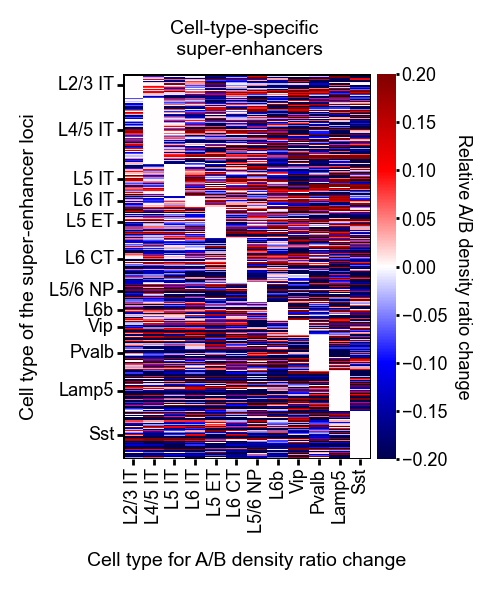

meta NOT subset; don't know how to subset; dropped


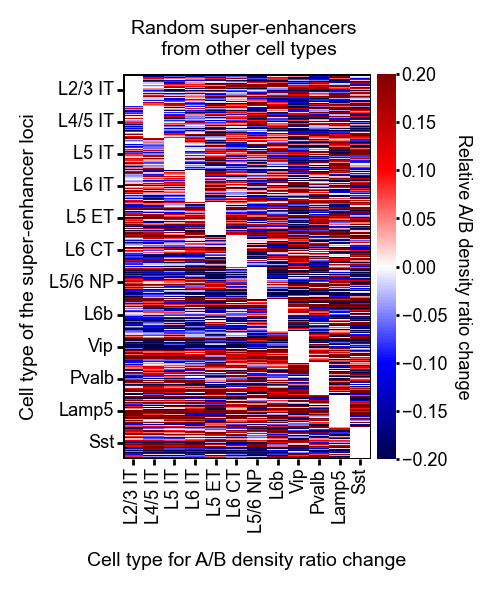

In [13]:
%matplotlib inline

for _dir in ['upregulated','random_control']:
    
    fig, ax = plt.subplots(1, 1, figsize=(_page_width/2.85, _page_width/2.2) , dpi=200, sharex=True, sharey=True)
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    sub_compiled_df = sub_compiled_df[sub_compiled_df['Marker_group'].isin(sorted_group_order)]
    
    mat_df = sub_compiled_df[sorted_group_order]
    mat_plot = mat_df.to_numpy()

    sns.heatmap(mat_df,vmin=-0.2, vmax=0.2, cmap='seismic', 
                ax=ax, cbar_kws={'label':'A/B ratio fold change', "pad": 0.02})


    # xticks
    ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5)
    ax.set_xticklabels(labels = mat_df.columns,fontsize=_font_size-0.5,
               rotation=90)

    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    group_nums = np.array(sub_compiled_df.groupby(['Marker_group'],sort=False).size().tolist())
    group_edges = np.cumsum(group_nums)
    yticks = (group_edges[1:] + group_edges[:-1])/2
    yticks = np.insert(yticks,0, int(group_nums[0]/2))
    yticks=[(_t-0.5) for _t in yticks]
    ax.set_yticks(ticks = yticks)
    ytick_labels  = [f'{_l}' for _l in group_plot]
    ax.set_yticklabels(labels = ytick_labels, fontsize=_font_size-1,
               rotation=0)
    
    ax.tick_params('x', labelsize=_font_size-0.5, 
                    #width=_ticklabel_width, 
                   length=_ticklabel_size,
                    labeltop=False,
                    pad=1, )
    ax.tick_params('y', labelsize=_font_size-0.5, 
                    #width=_ticklabel_width, 
                   length=_ticklabel_size,
                    #labeltop=False,
                    pad=1, )
    ax.figure.axes[-1].tick_params(axis='y', length=1, pad=1, labelsize=_font_size-0.5,)
    ax.figure.axes[-1].set_ylabel('Relative A/B density ratio change', fontsize=_font_size-0.5, rotation=270, labelpad=9)

    ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=mat_plot.shape[0], color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=mat_plot.shape[1], color='k',linewidth=1)

    
    ax.set_title(f'{_dir} Marker genes', fontsize=_font_size,pad=7)
    ax.set_xlabel('Cell type for A/B density ratio change', fontsize=_font_size,labelpad=7)
    ax.set_ylabel('Cell type of the DE gene loci', fontsize=_font_size)
    ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=mat_plot.shape[0], color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=mat_plot.shape[1], color='k',linewidth=1)
    
    if _dir == 'upregulated':
        ax.set_title(f'Cell-type-specific \n super-enhancers', fontsize=_font_size,pad=7)
    else:
        ax.set_title(f'Random super-enhancers \n from other cell types', fontsize=_font_size,pad=7)
        
    ax.set_xlabel('Cell type for A/B density ratio change', fontsize=_font_size,labelpad=7)
    ax.set_ylabel('Cell type of the super-enhancer loci', fontsize=_font_size)
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    plt.savefig(os.path.join(output_figure_folder,f'SE_{_groupby_savename}_{_dir}_AB_trans_density_change_heatmap_pm_majorType.pdf'),
                transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)

    plt.show()

## reduce loci for each marker group to its median

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_54836\1573429272.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mat_df = sub_compiled_df.groupby(['Marker_group'],sort=False).median()[sorted_group_order]
meta NOT subset; don't know how to subset; dropped
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_54836\1573429272.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mat_df = sub_compiled_df.groupby(['Marker_group'],sort=False).median()[sorted_group_order]
meta NOT subset; don't know how to subset; dropped


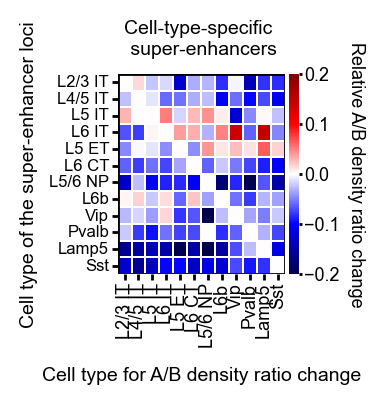

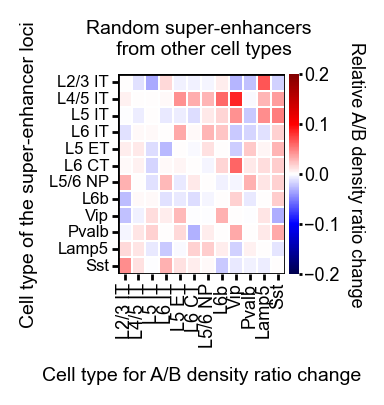

In [14]:
%matplotlib inline

for _dir in ['upregulated','random_control']:
    fig, ax = plt.subplots(1, 1, figsize=(1.3, 1.3) , dpi=200, sharex=True, sharey=True)
    
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    sub_compiled_df = sub_compiled_df[sub_compiled_df['Marker_group'].isin(sorted_group_order)]
    mat_df = sub_compiled_df.groupby(['Marker_group'],sort=False).median()[sorted_group_order]
    mat_plot = mat_df.to_numpy()

    sns.heatmap(mat_df,vmin=-0.2, vmax=0.2, cmap='seismic', 
                ax=ax, cbar_kws={'label':'A/B ratio fold change', "pad": 0.02}, linewidth=0.05)

    # xticks
    ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5)
    ax.set_xticklabels(labels = mat_df.columns,fontsize=_font_size-1,
               rotation=90)

    
    ax.tick_params('x', labelsize=_font_size-0.5, 
                    #width=_ticklabel_width, 
                   length=_ticklabel_size,
                    labeltop=False,
                    pad=1, )
    ax.tick_params('y', labelsize=_font_size-0.5, 
                    #width=_ticklabel_width, 
                   length=_ticklabel_size,
                    #labeltop=False,
                    pad=1, )
    ax.figure.axes[-1].tick_params(axis='y', length=1, pad=1, labelsize=_font_size-0.5,)
    ax.figure.axes[-1].set_ylabel('Relative A/B density ratio change', fontsize=_font_size-0.5, rotation=270, labelpad=9)
    
    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    ax.set_yticks(ticks = np.arange(len(group_plot))+0.5)
    ytick_labels  = group_plot
    ax.set_yticklabels(labels = ytick_labels,fontsize=_font_size-1,
               rotation=0)

    ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=mat_plot.shape[0], color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=mat_plot.shape[1], color='k',linewidth=1)

    
    if _dir == 'upregulated':
        ax.set_title(f'Cell-type-specific \n super-enhancers', fontsize=_font_size,pad=7)
    else:
        ax.set_title(f'Random super-enhancers \n from other cell types', fontsize=_font_size,pad=7)

    ax.set_xlabel('Cell type for A/B density ratio change', fontsize=_font_size,labelpad=7)
    ax.set_ylabel('Cell type of the super-enhancer loci', fontsize=_font_size)
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    
    plt.savefig(os.path.join(output_figure_folder,f'SE_{_groupby_savename}_{_dir}_AB_trans_density_change_heatmap_REDUCED_pm_majorType.pdf'),
                transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)

